# Dataset analysis



In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

from pathlib import Path
import sys
sys.path.insert(0, Path(".").absolute().parent.as_posix())

import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from common.dataset import TrainvalFilesDataset, TransformedDataset, read_image, TestFilesDataset

## Original train dataset

In [4]:
dataset = TrainvalFilesDataset("/home/fast_storage/imaterialist-challenge-furniture-2018/train/")
img_dataset = TransformedDataset(dataset, transforms=lambda x: read_image(x), target_transforms=lambda y: y - 1)

In [5]:
import numpy as np
import pandas as pd

In [6]:
from PIL import Image
from tqdm import tqdm

sizes= [None] * len(dataset)
y = [None] * len(dataset)

for i, dp in enumerate(tqdm(dataset)):
    img = read_image(dp[0])
    sizes[i] = img.size
    y[i] = dp[1]

100%|██████████| 191260/191260 [00:42<00:00, 4471.42it/s]


In [7]:
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.DataFrame({"width": np.array(sizes)[:, 0], "height": np.array(sizes)[:, 1], "label": y})

In [9]:
df.head()

,height,label,width
0,715,9,1432
1,800,44,800
2,375,92,500
3,800,53,800
4,300,16,450


In [10]:
df.describe()

,height,label,width
count,191260.000000,191260.000000,191260.000000
mean,721.153540,63.352447,759.287054
std,303.299629,37.304801,324.957609
min,1.000000,1.000000,1.000000
25%,524.000000,31.000000,640.000000
50%,800.000000,62.000000,800.000000
75%,800.000000,96.000000,800.000000
max,6614.000000,128.000000,7874.000000


In [13]:
m1 = (df["height"] < 250) | (df["width"] < 250)
small_images = df[m1]
small_images.shape

(240, 3)

Text(0.5,1,'Small image sizes')

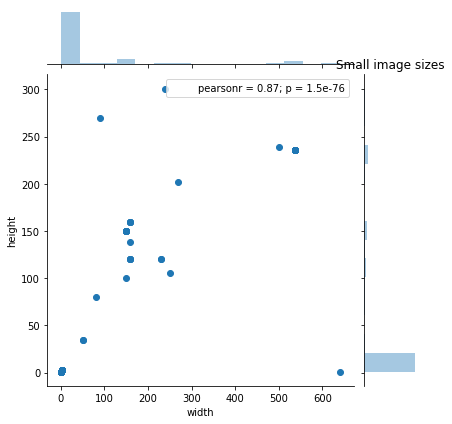

In [14]:
sns.jointplot(y="height", x="width", data=df[m1], kind='scatter')
plt.title("Small image sizes")

In [93]:
from image_dataset_viz import render_datapoint, DatasetExporter

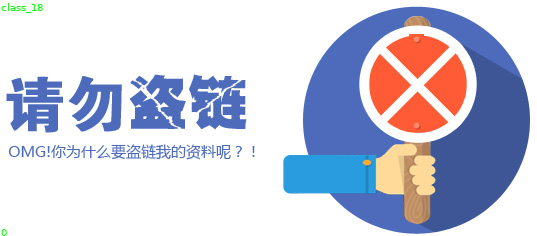

In [115]:
img, label = img_dataset[180095]
render_datapoint(img, "class_{}".format(label), image_id="0")

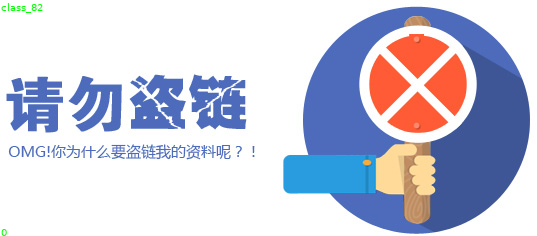

In [117]:
img, label = img_dataset[190066]
render_datapoint(img, "class_{}".format(label), image_id="0")

In [118]:
filtered_df = df.drop(index=small_images.index)

In [119]:
filtered_df.describe()

,height,width
count,191020.000000,191020.000000
mean,722.023097,760.178542
std,302.486018,324.151966
min,258.000000,258.000000
25%,525.000000,640.000000
50%,800.000000,800.000000
75%,800.000000,800.000000
max,6614.000000,7874.000000


Visualize the largest images

In [212]:
m2 = (df["height"] > 1000) & (df["width"] > 1000)
large_images = df[m2]
large_images.shape

(7223, 3)

Text(0.5,1,'Large image sizes')

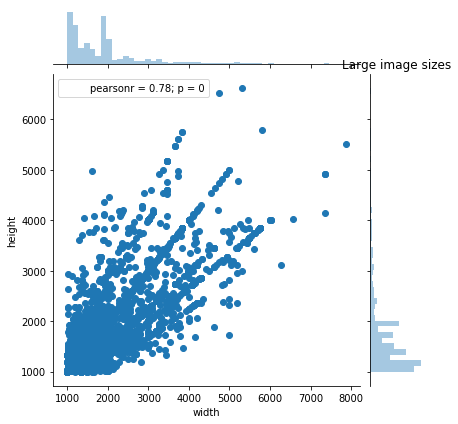

In [42]:
sns.jointplot(y="height", x="width", data=df[m2], kind='scatter')
plt.title("Large image sizes")

In [122]:
large_images[large_images["width"] > 7000]

,height,width
1994,4140,7360
2271,4912,7360
63293,4912,7360
123862,5512,7874
190425,4912,7360


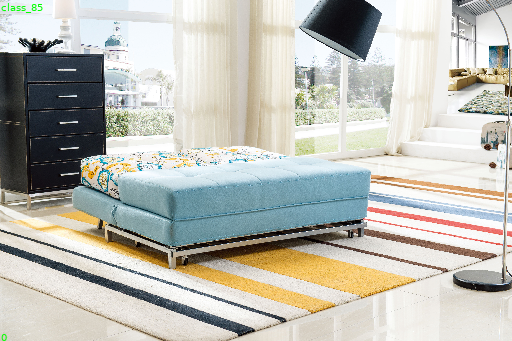

In [123]:
img, label = img_dataset[190425]
render_datapoint(img, "class_{}".format(label), image_id="0", output_size=(512, 512))

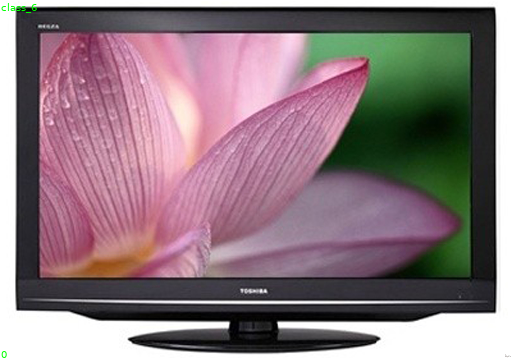

In [124]:
img, label = img_dataset[123862]
render_datapoint(img, "class_{}".format(label), image_id="0", output_size=(512, 512))

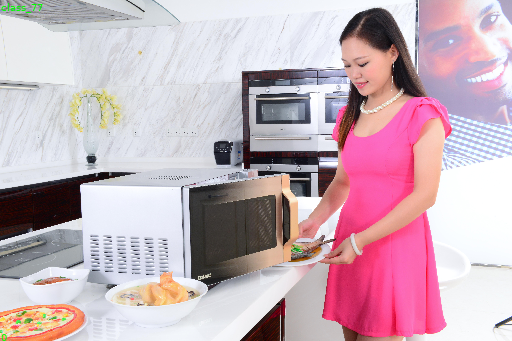

In [125]:
img, label = img_dataset[63293]
render_datapoint(img, "class_{}".format(label), image_id="0", output_size=(512, 512))

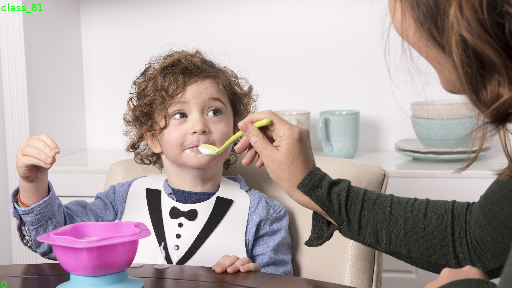

In [126]:
img, label = img_dataset[1994]
render_datapoint(img, "class_{}".format(label), image_id="0", output_size=(512, 512))

In [188]:
normal_images = df[~m1 & ~m2]
normal_images.shape

(12142, 3)

In [198]:
df[m1].corr()

,height,label,width
height,1.000000,-0.135798,0.873967
label,-0.135798,1.000000,-0.140664
width,0.873967,-0.140664,1.000000


In [213]:
df[m2].corr()

,height,label,width
height,1.000000,-0.058877,0.778807
label,-0.058877,1.000000,-0.047819
width,0.778807,-0.047819,1.000000


In [218]:
df.corr()

,height,label,width
height,1.000000,-0.007114,0.866089
label,-0.007114,1.000000,-0.008706
width,0.866089,-0.008706,1.000000


Save non-small images

In [23]:
df['filepath'] = dataset[:][0]

In [24]:
nonsmall_images = df[~m1]

In [25]:
nonsmall_images.head()

,height,label,width,filepath
0,715,9,1432,/home/fast_storage/imaterialist-challenge-furn...
1,800,44,800,/home/fast_storage/imaterialist-challenge-furn...
2,375,92,500,/home/fast_storage/imaterialist-challenge-furn...
3,800,53,800,/home/fast_storage/imaterialist-challenge-furn...
4,300,16,450,/home/fast_storage/imaterialist-challenge-furn...


In [29]:
nonsmall_images[['filepath', 'label']].to_csv("../output/filtered_train_dataset.csv", index=False)

In [30]:
!head -5 "../output/filtered_train_dataset.csv"

filepath,label
/home/fast_storage/imaterialist-challenge-furniture-2018/train/8626_9.png,9
/home/fast_storage/imaterialist-challenge-furniture-2018/train/149776_44.png,44
/home/fast_storage/imaterialist-challenge-furniture-2018/train/104184_92.png,92
/home/fast_storage/imaterialist-challenge-furniture-2018/train/106732_53.png,53


In [33]:
from common.dataset import FilesFromCsvDataset

In [34]:
filtered_ds = FilesFromCsvDataset("../output/filtered_train_dataset.csv")

In [36]:
len(filtered_ds), len(df)

(191020, 191260)

## Validation dataset

In [37]:
val_dataset = TrainvalFilesDataset("/home/fast_storage/imaterialist-challenge-furniture-2018/validation/")
img_val_dataset = TransformedDataset(val_dataset, transforms=lambda x: read_image(x), target_transforms=lambda y: y - 1)

In [38]:
from PIL import Image
from tqdm import tqdm

val_sizes= [None] * len(val_dataset)
val_y = [None] * len(val_dataset)

for i, dp in enumerate(tqdm(val_dataset)):
    img = read_image(dp[0])
    val_sizes[i] = img.size
    val_y[i] = dp[1]

100%|██████████| 6300/6300 [00:01<00:00, 4751.05it/s]


In [39]:
val_df = pd.DataFrame({"width": np.array(val_sizes)[:, 0], "height": np.array(val_sizes)[:, 1], "label": val_y})

In [40]:
val_df.head()

,height,label,width
0,800,48,800
1,550,79,730
2,800,119,800
3,480,27,640
4,800,22,800


In [41]:
val_df.describe()

,height,label,width
count,6300.000000,6300.000000,6300.000000
mean,715.816032,64.679841,751.481270
std,316.474421,36.928006,322.574464
min,1.000000,1.000000,1.000000
25%,500.000000,33.000000,600.000000
50%,800.000000,65.000000,800.000000
75%,800.000000,97.000000,800.000000
max,5792.000000,128.000000,6016.000000


In [42]:
m1 = (val_df["height"] < 250) | (val_df["width"] < 250)
small_images = val_df[m1]
small_images.shape

(9, 3)

/usr/local/lib/python3.5/dist-packages/scipy/stats/stats.py:3003: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


Text(0.5,1,'Small image sizes')

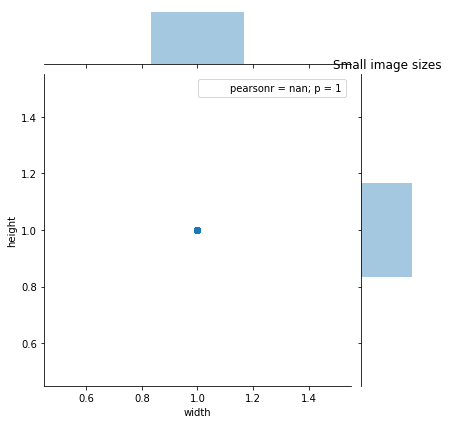

In [43]:
sns.jointplot(y="height", x="width", data=val_df[m1], kind='scatter')
plt.title("Small image sizes")

In [136]:
small_images

,height,width
151,1,1
168,1,1
188,1,1
343,1,1
1269,1,1
3066,1,1
3130,1,1
3713,1,1
5782,1,1


Visualize the largest images

In [215]:
m2 = (val_df["height"] > 1000) & (val_df["width"] > 1000)
large_images = val_df[m2]
large_images.shape

(235, 3)

Text(0.5,1,'Large image sizes')

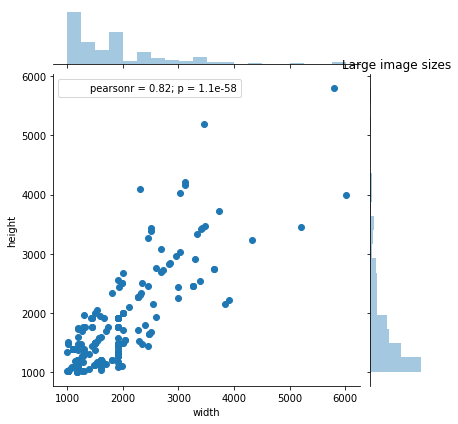

In [139]:
sns.jointplot(y="height", x="width", data=val_df[m2], kind='scatter')
plt.title("Large image sizes")

In [140]:
large_images[large_images["width"] > 5000]

,height,width
1959,4000,6016
5314,5792,5792
5987,3451,5198


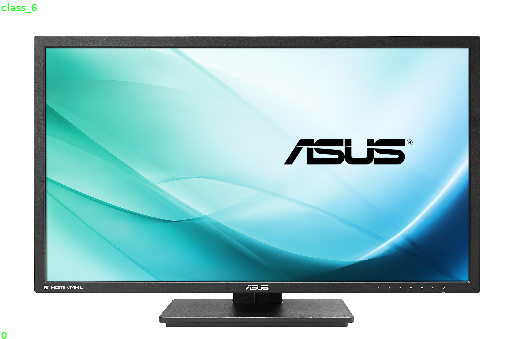

In [141]:
img, label = img_val_dataset[5987]
render_datapoint(img, "class_{}".format(label), image_id="0", output_size=(512, 512))

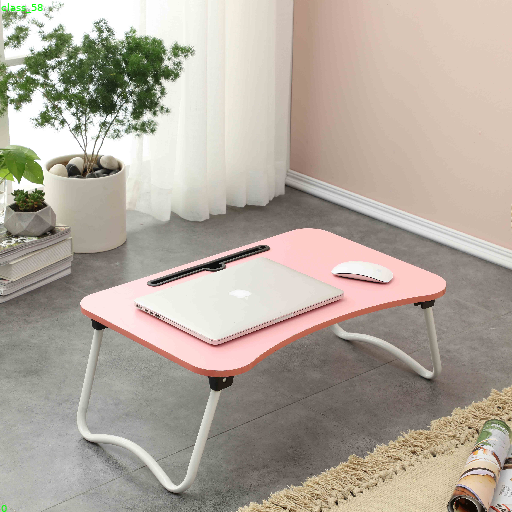

In [142]:
img, label = img_val_dataset[5314]
render_datapoint(img, "class_{}".format(label), image_id="0", output_size=(512, 512))

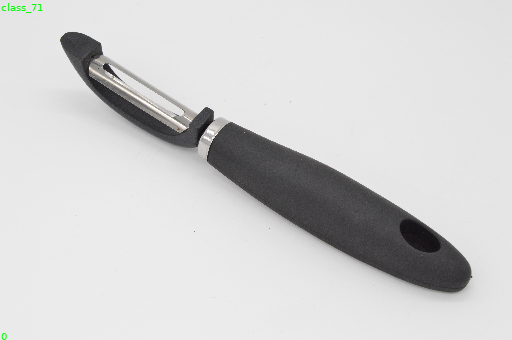

In [143]:
img, label = img_val_dataset[1959]
render_datapoint(img, "class_{}".format(label), image_id="0", output_size=(512, 512))

In [148]:
not_small_images = val_df[~m1]
not_small_images.shape

(6291, 2)

Text(0.5,1,'Normal image sizes')

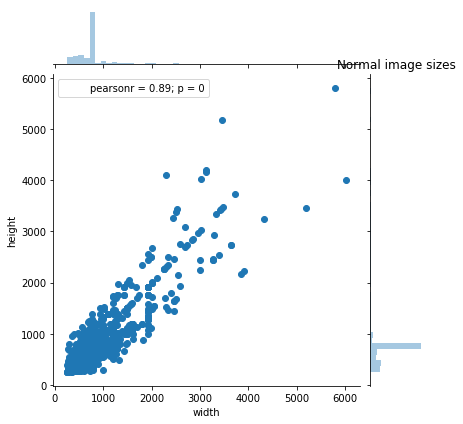

In [149]:
sns.jointplot(y="height", x="width", data=not_small_images, kind='scatter')
plt.title("Normal image sizes")

In [217]:
val_df.corr()

,height,label,width
height,1.000000,-0.033055,0.887610
label,-0.033055,1.000000,-0.032925
width,0.887610,-0.032925,1.000000


In [221]:
val_df[m1].corr()

,height,label,width
height,NaN,NaN,NaN
label,NaN,1.0,NaN
width,NaN,NaN,NaN


In [224]:
val_df[m2].corr()

,height,label,width
height,1.000000,-0.120429,0.821221
label,-0.120429,1.000000,-0.087899
width,0.821221,-0.087899,1.000000


Save non small images

In [46]:
val_df['filepath'] = val_dataset[:][0]

In [47]:
nonsmall_images = val_df[~m1]

In [48]:
nonsmall_images.head()

,height,label,width,filepath
0,800,48,800,/home/fast_storage/imaterialist-challenge-furn...
1,550,79,730,/home/fast_storage/imaterialist-challenge-furn...
2,800,119,800,/home/fast_storage/imaterialist-challenge-furn...
3,480,27,640,/home/fast_storage/imaterialist-challenge-furn...
4,800,22,800,/home/fast_storage/imaterialist-challenge-furn...


In [49]:
nonsmall_images[['filepath', 'label']].to_csv("../output/filtered_val_dataset.csv", index=False)

In [50]:
!head -5 "../output/filtered_val_dataset.csv"

filepath,label
/home/fast_storage/imaterialist-challenge-furniture-2018/validation/6302_48.png,48
/home/fast_storage/imaterialist-challenge-furniture-2018/validation/3349_79.png,79
/home/fast_storage/imaterialist-challenge-furniture-2018/validation/484_119.png,119
/home/fast_storage/imaterialist-challenge-furniture-2018/validation/2677_27.png,27


In [51]:
from common.dataset import FilesFromCsvDataset

In [52]:
filtered_ds = FilesFromCsvDataset("../output/filtered_val_dataset.csv")

In [54]:
len(filtered_ds), len(val_df)

(6291, 6300)

## Test dataset

In [165]:
test_dataset = TestFilesDataset("/home/fast_storage/imaterialist-challenge-furniture-2018/test/")
img_test_dataset = TransformedDataset(test_dataset, transforms=lambda x: read_image(x))

In [155]:
from PIL import Image
from tqdm import tqdm

test_sizes= [None] * len(test_dataset)

for i, dp in enumerate(tqdm(test_dataset)):
    img = read_image(dp[0])
    test_sizes[i] = img.size

100%|██████████| 12639/12639 [00:01<00:00, 7088.91it/s]


In [156]:
test_df = pd.DataFrame({"width": np.array(test_sizes)[:, 0], "height": np.array(test_sizes)[:, 1]})

In [157]:
test_df.head()

,height,width
0,750,750
1,722,889
2,800,800
3,500,500
4,800,800


In [158]:
test_df.describe()

,height,width
count,12639.000000,12639.000000
mean,720.325500,757.192104
std,311.290307,327.373679
min,1.000000,1.000000
25%,532.000000,640.000000
50%,800.000000,800.000000
75%,800.000000,800.000000
max,5616.000000,5760.000000


In [163]:
m1 = (test_df["height"] < 250) | (test_df["width"] < 250)
small_images = test_df[m1]
small_images.shape

(14, 2)

Text(0.5,1,'Small image sizes')

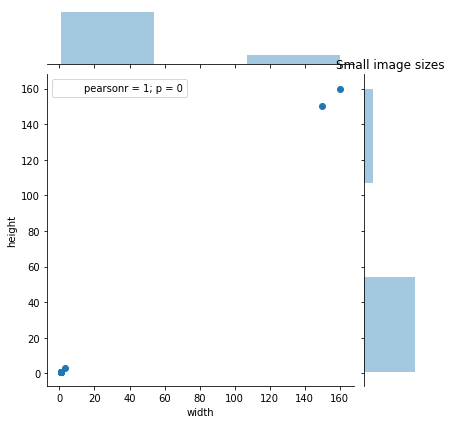

In [164]:
sns.jointplot(y="height", x="width", data=test_df[m1], kind='scatter')
plt.title("Small image sizes")

In [161]:
small_images

,height,width
911,1,1
1569,3,3
2045,1,1
2599,1,1
4663,1,1
4852,1,1
7118,1,1
7729,1,1
9209,1,1
10083,160,160


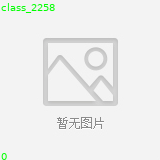

In [166]:
img, label = img_test_dataset[10083]
render_datapoint(img, "class_{}".format(label), image_id="0", output_size=(512, 512))

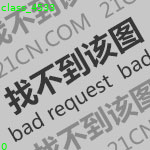

In [167]:
img, label = img_test_dataset[11464]
render_datapoint(img, "class_{}".format(label), image_id="0", output_size=(512, 512))

Visualize the largest images

In [168]:
m2 = (test_df["height"] > 1000) & (test_df["width"] > 1000)
large_images = test_df[m2]
large_images.shape

(446, 2)

Text(0.5,1,'Large image sizes')

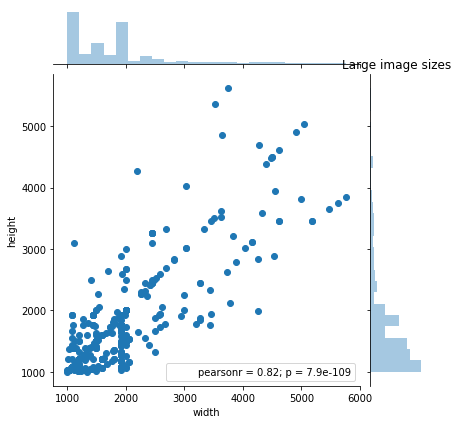

In [169]:
sns.jointplot(y="height", x="width", data=test_df[m2], kind='scatter')
plt.title("Large image sizes")

In [170]:
large_images[large_images["width"] > 5000]

,height,width
301,3456,5184
1118,5035,5035
2022,3456,5184
5370,3648,5472
7363,3744,5616
11098,3840,5760


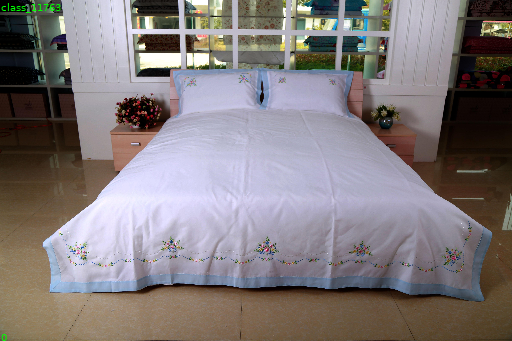

In [171]:
img, label = img_test_dataset[11098]
render_datapoint(img, "class_{}".format(label), image_id="0", output_size=(512, 512))

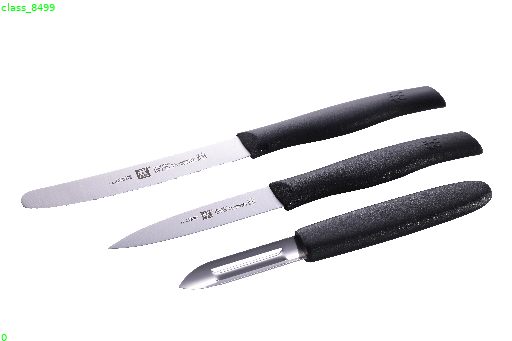

In [172]:
img, label = img_test_dataset[7363]
render_datapoint(img, "class_{}".format(label), image_id="0", output_size=(512, 512))

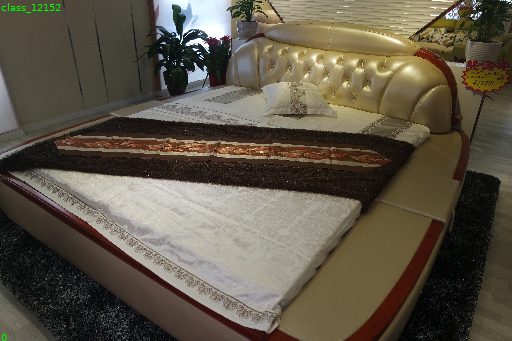

In [173]:
img, label = img_test_dataset[5370]
render_datapoint(img, "class_{}".format(label), image_id="0", output_size=(512, 512))

In [174]:
not_small_images = test_df[~m1]
not_small_images.shape

(12625, 2)

Text(0.5,1,'Normal image sizes')

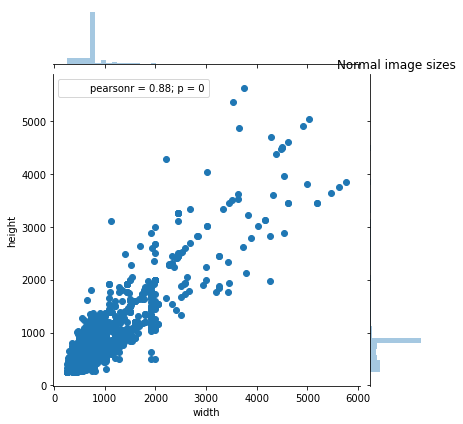

In [175]:
sns.jointplot(y="height", x="width", data=not_small_images, kind='scatter')
plt.title("Normal image sizes")

400 x 400 pixels

In [5]:
dataset = TrainvalFilesDataset("/home/storage_ext4_1tb/imaterialist-challenge-furniture-2018/train_400x400/")
img_dataset = TransformedDataset(dataset, transforms=lambda x: read_image(x), target_transforms=lambda y: y - 1)

Let's display few examples of all classes

In [6]:
n_samples = len(dataset)
indices = np.zeros((n_samples, 1), dtype=np.int)
y = np.zeros((n_samples,), dtype=np.int)

for i, dp in enumerate(dataset):
    y[i] = dp[1]
    indices[i, 0] = i

In [7]:
few_examples_per_class_indices = np.zeros((128, 5), dtype=np.int)
for i in range(1, 129):
    few_examples_per_class_indices[i - 1, :] = indices[y == i, 0][:5]

In [8]:
from image_dataset_viz import render_datapoint, DatasetExporter

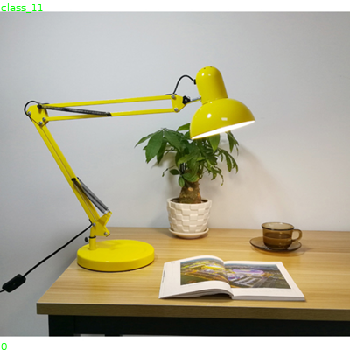

In [9]:
img, label = img_dataset[0]
render_datapoint(img, "class_{}".format(label), image_id="0", output_size=(350, 350))

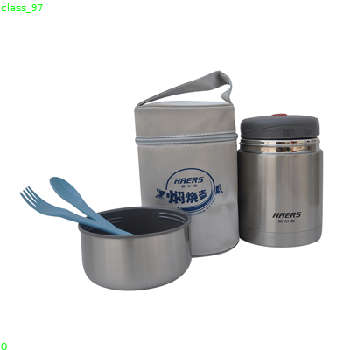

In [10]:
img, label = img_dataset[12]
render_datapoint(img, "class_{}".format(label), image_id="0", output_size=(350, 350))

Export images as a single large image

In [13]:
def read_img_fn(index):
    return img_dataset[index][0]


def read_label_fn(index):
    return "class_{}".format(img_dataset[index][1])


de = DatasetExporter(read_img_fn, read_label_fn, 
                     img_id_fn=lambda x: str(x), 
                     max_output_img_size=(250, 250), 
                     n_cols=15,            
                     text_color=(0, 255, 0), text_size=12)

In [16]:
idx = few_examples_per_class_indices.ravel().tolist()
de.export(idx, idx, "five_examples_per_class_viz")

100%|##########|640/640[00:11<00:00,55.28it/s] 


Similar classes:


In [17]:
hard_chair_classes = [
    14, 3, 28, 25, 62, 125
]

In [21]:
few_examples_per_hard_chairs_indices = np.zeros((len(hard_chair_classes), 15), dtype=np.int)
for i, c in enumerate(hard_chair_classes):
    few_examples_per_hard_chairs_indices[i, :] = indices[y == c + 1, 0][:15]

In [22]:
from image_dataset_viz import render_datapoint, DatasetExporter

In [23]:
def read_img_fn(index):
    return img_dataset[index][0]


def read_label_fn(index):
    return "class_{}".format(img_dataset[index][1])


de = DatasetExporter(read_img_fn, read_label_fn, 
                     img_id_fn=lambda x: str(x), 
                     max_output_img_size=(250, 250), 
                     n_cols=15,            
                     text_color=(0, 255, 0), text_size=12)

idx = few_examples_per_hard_chairs_indices.ravel().tolist()
de.export(idx, idx, "hard_chairs_classes_viz")

100%|##########|90/90[00:04<00:00,19.09it/s]
